In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import preprocessing,tree

In [101]:
data=pd.read_csv('Company_Data.csv')

In [102]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [103]:
data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [104]:
label_encoder=preprocessing.LabelEncoder()
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['US']=label_encoder.fit_transform(data['US'])

In [105]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [106]:
x=data.iloc[:,0:6]
y=data['ShelveLoc']
x,y

(     Sales  CompPrice  Income  Advertising  Population  Price
 0     9.50        138      73           11         276    120
 1    11.22        111      48           16         260     83
 2    10.06        113      35           10         269     80
 3     7.40        117     100            4         466     97
 4     4.15        141      64            3         340    128
 ..     ...        ...     ...          ...         ...    ...
 395  12.57        138     108           17         203    128
 396   6.14        139      23            3          37    120
 397   7.41        162      26           12         368    159
 398   5.94        100      79            7         284     95
 399   9.71        134      37            0          27    120
 
 [400 rows x 6 columns],
 0      3
 1      1
 2      2
 3      2
 4      3
       ..
 395    1
 396    2
 397    2
 398    3
 399    1
 Name: ShelveLoc, Length: 400, dtype: int64)

In [107]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [108]:
y_train

85     2
69     2
203    3
379    3
261    2
      ..
306    2
165    3
7      1
219    1
326    2
Name: ShelveLoc, Length: 320, dtype: int64

In [109]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'X[0] <= 6.165\nentropy = 1.462\nsamples = 320\nvalue = [67, 170, 83]'),
 Text(0.25, 0.625, 'X[0] <= 3.33\nentropy = 1.0\nsamples = 108\nvalue = [0, 53, 55]'),
 Text(0.125, 0.375, 'X[2] <= 56.0\nentropy = 0.503\nsamples = 18\nvalue = [0, 2, 16]'),
 Text(0.0625, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13]'),
 Text(0.375, 0.375, 'X[5] <= 151.5\nentropy = 0.987\nsamples = 90\nvalue = [0, 51, 39]'),
 Text(0.3125, 0.125, 'entropy = 0.996\nsamples = 84\nvalue = [0, 45, 39]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.75, 0.625, 'X[0] <= 10.425\nentropy = 1.384\nsamples = 212\nvalue = [67, 117, 28]'),
 Text(0.625, 0.375, 'X[5] <= 97.5\nentropy = 1.281\nsamples = 160\nvalue = [31, 104, 25]'),
 Text(0.5625, 0.125, 'entropy = 1.155\nsamples = 33\nvalue = [1, 18, 14]'),
 Text(0.6875, 0.125, 'entropy = 1.178\nsamples = 127\nvalue = [30, 86, 11]'),
 Text(0.875,

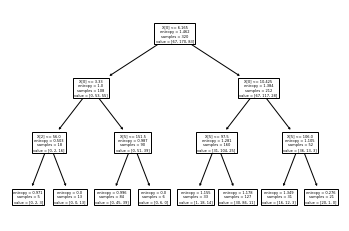

In [110]:
tree.plot_tree(model)

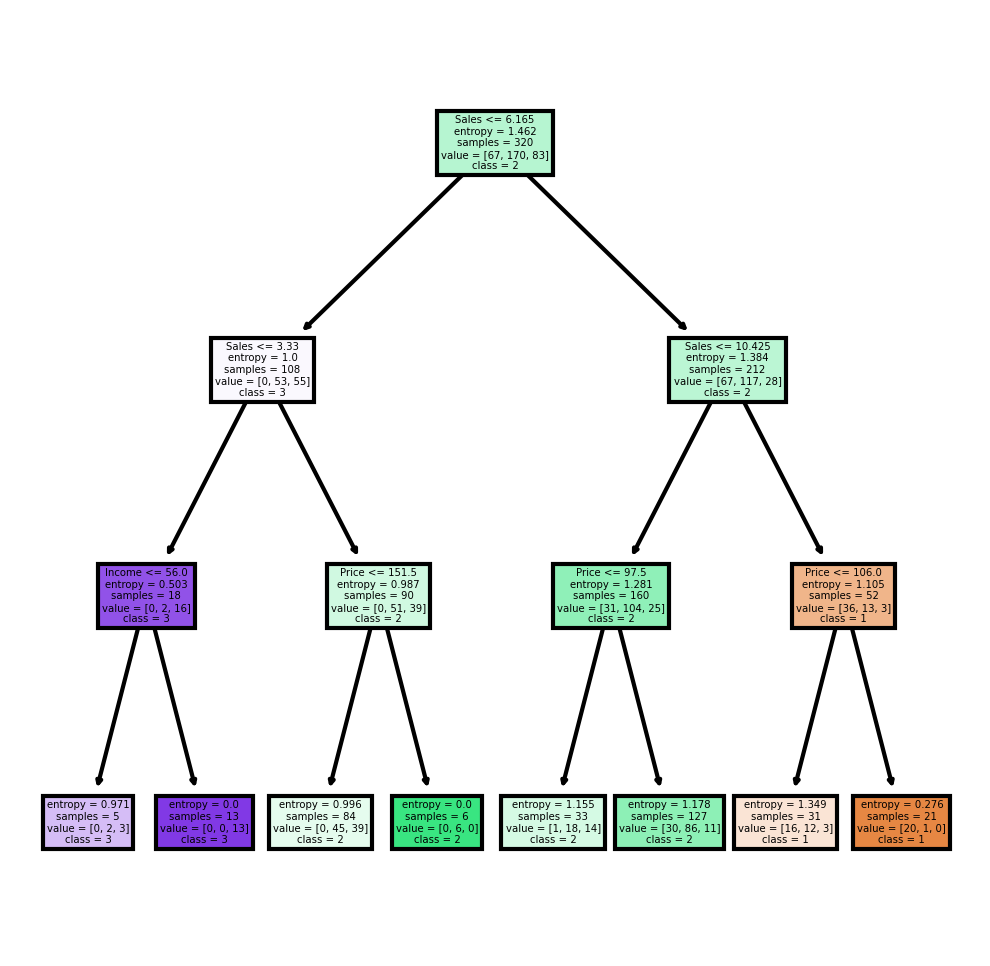

In [111]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [112]:
preds = model.predict(x_test)
pd.Series(preds).value_counts() 

2    63
1    13
3     4
dtype: int64

In [113]:
pd.crosstab(y_test,preds)

col_0,1,2,3
ShelveLoc,,,
1,8,10,0
2,5,41,3
3,0,12,1


In [114]:
#Accuracy
np.mean(preds==y_test)

0.625

In [117]:
model2=DecisionTreeClassifier(criterion = 'gini',max_depth=3).fit(x_train,y_train)

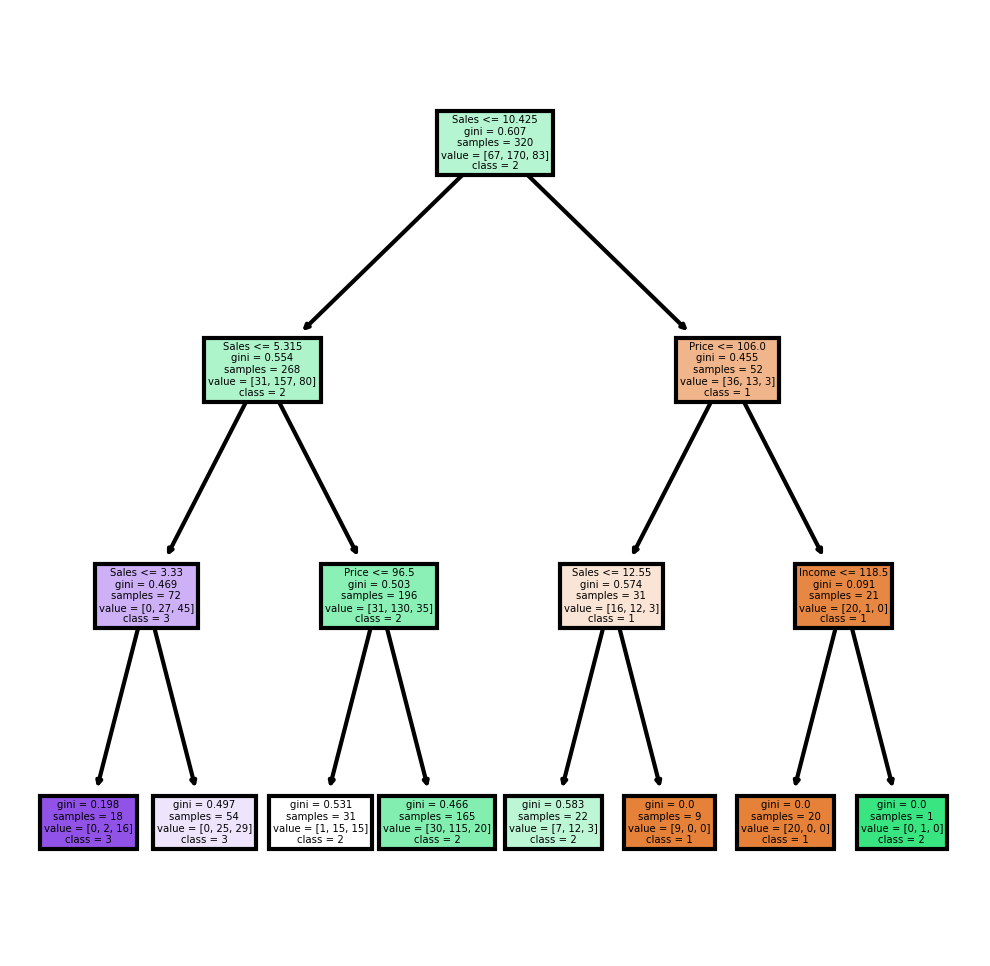

In [118]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [120]:
#Accuracy
preds = model.predict(x_test)
np.mean(preds==y_test)

0.625